<h1 style="text-align:center">HemoScope: Classifying Anaemia types</h1>

<h4 style="text-align:center">Classifying different types of anaemia based on CBC data.</h4>

In [296]:
import warnings
warnings.filterwarnings('ignore')

In [297]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [298]:
df = pd.read_csv("Anaemic_data.csv")
df

,WBC,LYMp,NEUTp,LYMn,NEUTn,RBC,HGB,HCT,MCV,MCH,MCHC,PLT,PDW,PCT,Diagnosis
0,10.00,43.200,50.100,4.30000,5.00000,2.77,7.3,24.2000,87.7,26.3,30.1,189.0,12.500000,0.17000,Normocytic hypochromic anemia
1,10.00,42.400,52.300,4.20000,5.30000,2.84,7.3,25.0000,88.2,25.7,20.2,180.0,12.500000,0.16000,Normocytic hypochromic anemia
2,7.20,30.700,60.700,2.20000,4.40000,3.97,9.0,30.5000,77.0,22.6,29.5,148.0,14.300000,0.14000,Iron deficiency anemia
3,6.00,30.200,63.500,1.80000,3.80000,4.22,3.8,32.8000,77.9,23.2,29.8,143.0,11.300000,0.12000,Iron deficiency anemia
4,4.20,39.100,53.700,1.60000,2.30000,3.93,0.4,316.0000,80.6,23.9,29.7,236.0,12.800000,0.22000,Normocytic hypochromic anemia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1276,4.40,25.845,77.511,1.88076,5.14094,4.86,13.5,46.1526,80.7,27.7,34.4,180.0,14.312512,0.26028,Healthy
1277,5.60,25.845,77.511,1.88076,5.14094,4.85,15.0,46.1526,91.7,31.0,33.8,215.0,14.312512,0.26028,Healthy
1278,9.20,25.845,77.511,1.88076,5.14094,4.47,13.1,46.1526,88.7,29.3,33.0,329.0,14.312512,0.26028,Healthy
1279,6.48,25.845,77.511,1.88076,5.14094,4.75,13.2,46.1526,86.7,27.9,32.1,174.0,14.312512,0.26028,Healthy


# Data Preprocessing

In [299]:
rows = df.shape[0]
columns = df.shape[1]

print(f"Number of data points: {rows}")
print(f"Number of features: {columns}")

Number of data points: 1281
Number of features: 15


In [300]:
df.dtypes

WBC          float64
LYMp         float64
NEUTp        float64
LYMn         float64
NEUTn        float64
RBC          float64
HGB          float64
HCT          float64
MCV          float64
MCH          float64
MCHC         float64
PLT          float64
PDW          float64
PCT          float64
Diagnosis     object
dtype: object

In [301]:
df.isnull().sum()

WBC          0
LYMp         0
NEUTp        0
LYMn         0
NEUTn        0
RBC          0
HGB          0
HCT          0
MCV          0
MCH          0
MCHC         0
PLT          0
PDW          0
PCT          0
Diagnosis    0
dtype: int64

No null values in the dataset

In [302]:
unique_vals = df["Diagnosis"].nunique()

print(f"Number of classes in Diagnosis column: {unique_vals}")

Number of classes in Diagnosis column: 9


# Data Visualization

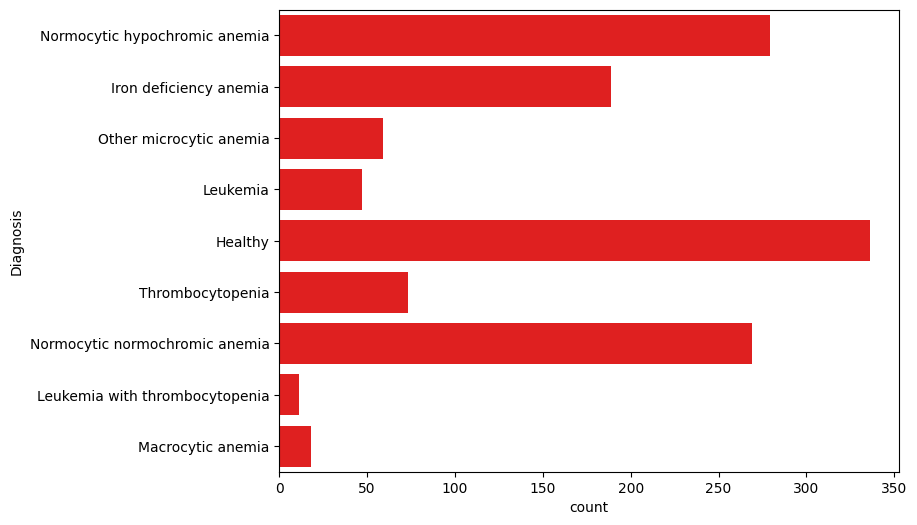

In [303]:
plt.figure(figsize=(8, 6))
sns.countplot(df["Diagnosis"], color='red')
plt.show()

The majority class is Healthy and the minority class is Leukemia with thrombocytopenia.

### Histogram

In [304]:
def plot_distribution(column_name):
    plt.figure(figsize=(8, 4))
    sns.histplot(df[column_name], color='deeppink', kde=True)
    plt.title("Distribution of {}".format(column_name))
    plt.xlabel(column_name)
    plt.ylabel("Count")
    plt.show()

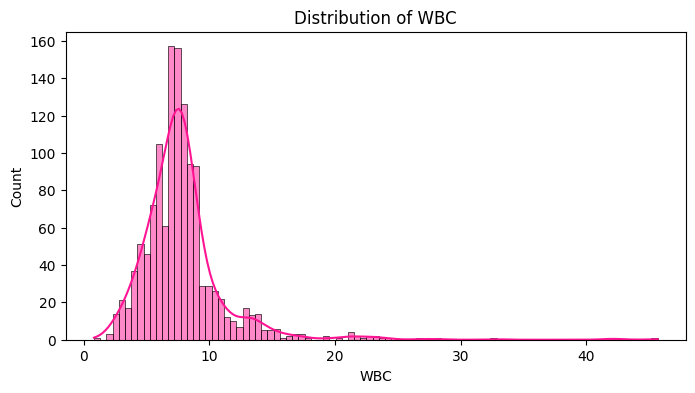

In [305]:
plot_distribution("WBC")

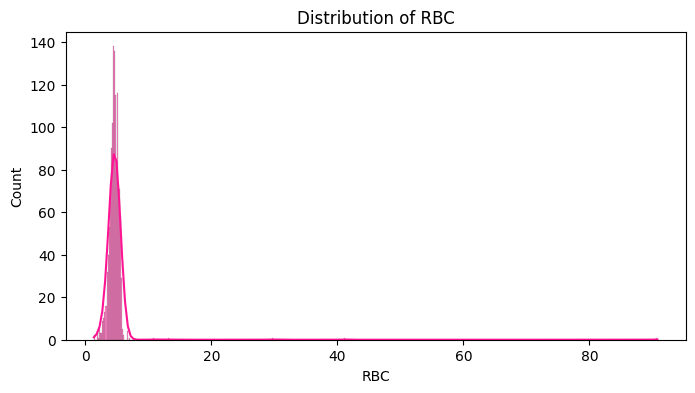

In [306]:
plot_distribution("RBC")

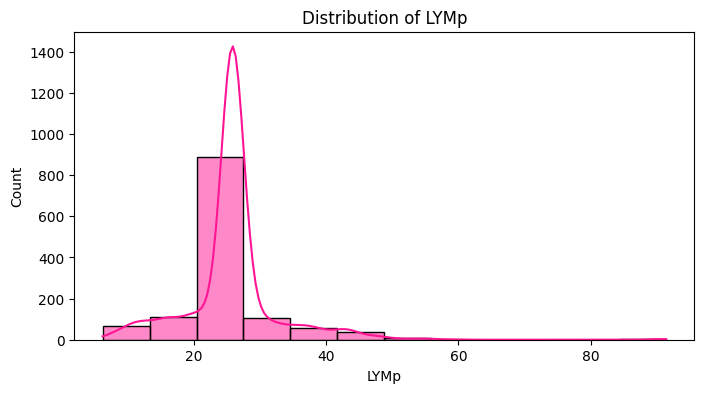

In [307]:
plot_distribution("LYMp")

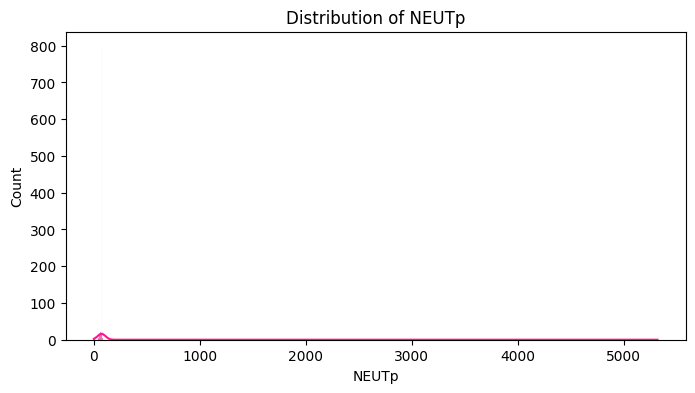

In [308]:
plot_distribution("NEUTp")

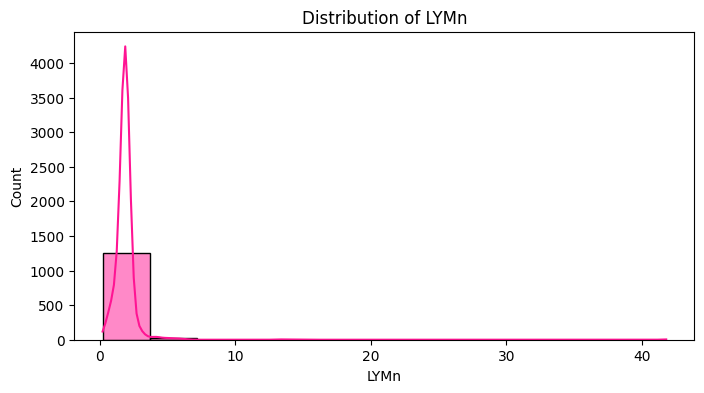

In [309]:
plot_distribution("LYMn")

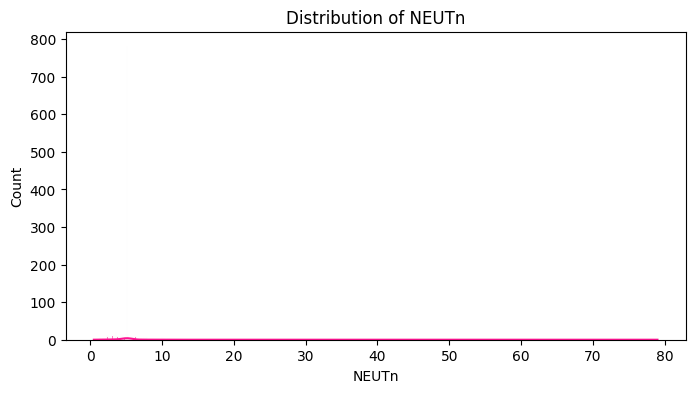

In [310]:
plot_distribution("NEUTn")

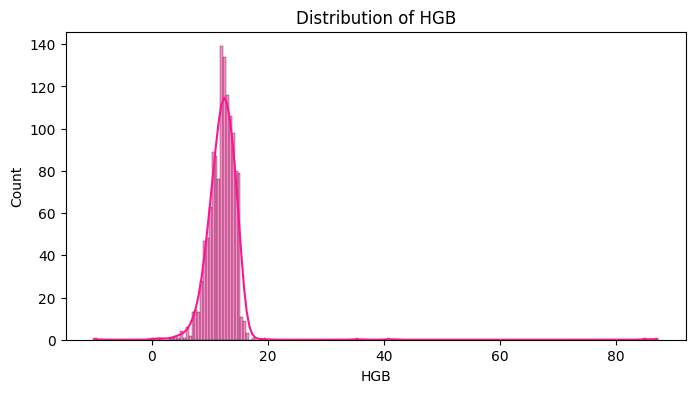

In [311]:
plot_distribution(("HGB"))

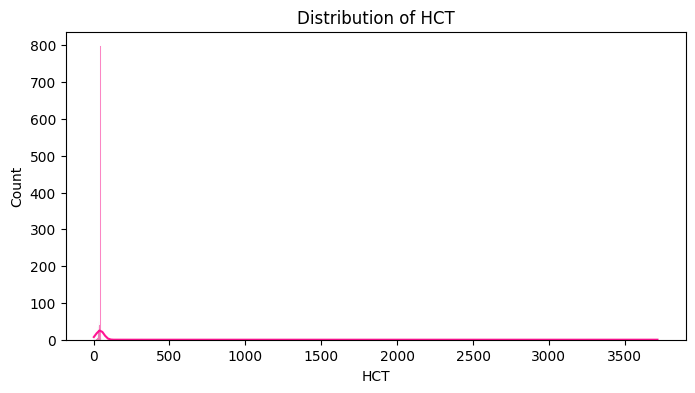

In [312]:
plot_distribution("HCT")

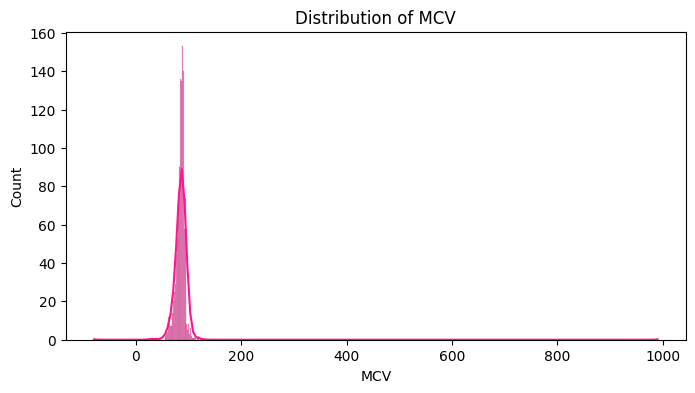

In [313]:
plot_distribution("MCV")

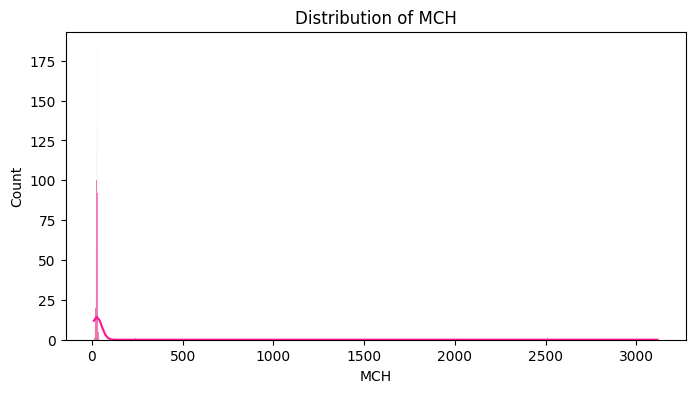

In [314]:
plot_distribution("MCH")

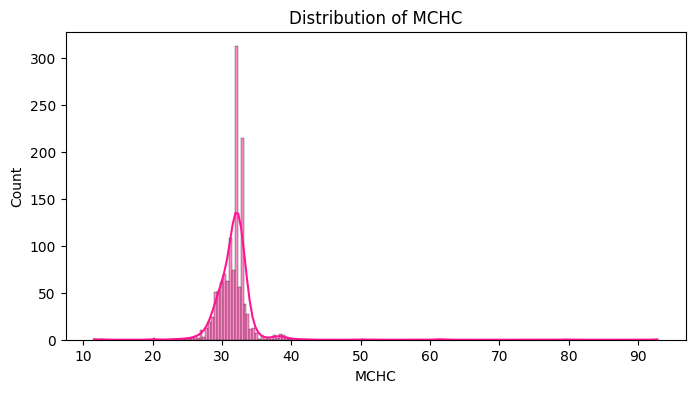

In [315]:
plot_distribution("MCHC")

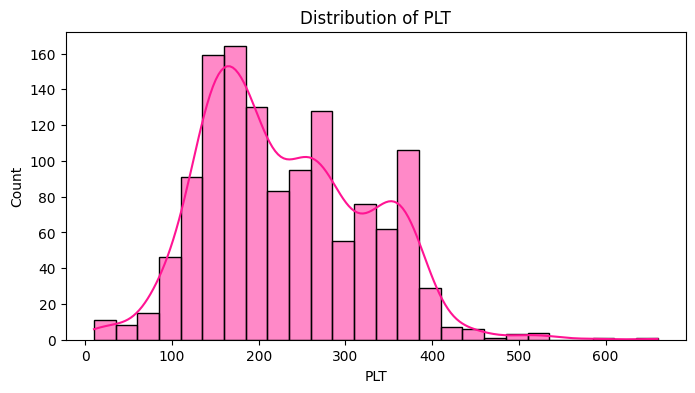

In [316]:
plot_distribution("PLT")

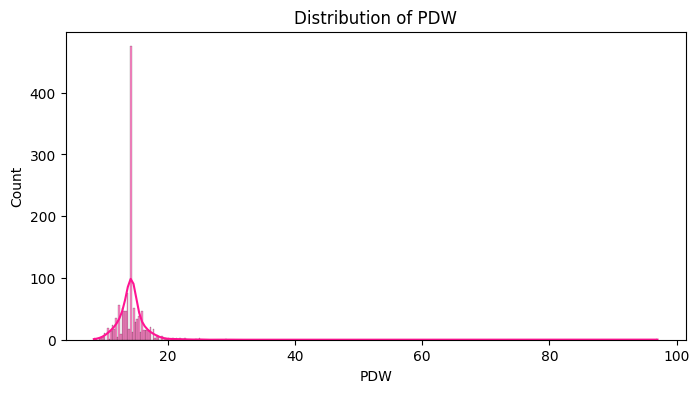

In [317]:
plot_distribution("PDW")

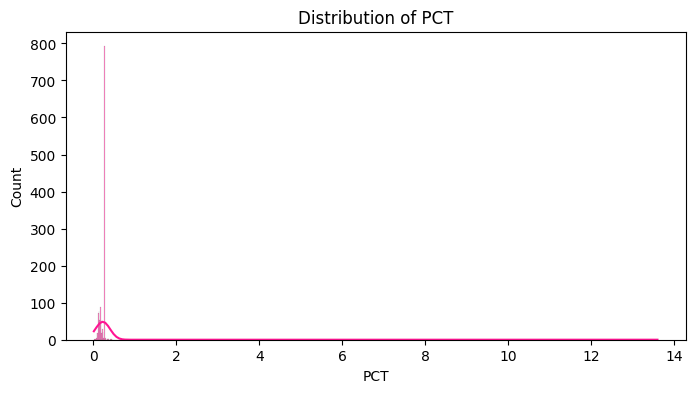

In [318]:
plot_distribution("PCT")

The slight deviations cannot be considered as outliers as these tend to be highly realistic in the medical industry.

### Box Plot

In [319]:
def draw_box_plot(data, categorical_column, numerical_column):
    # Box plot
    plt.figure(figsize=(8, 6))
    sns.boxplot(y=categorical_column, x=numerical_column, data=data, color='gold')
    plt.title('Box Plot of {} by {}'.format(numerical_column, categorical_column))
    plt.xlabel(numerical_column)
    plt.ylabel(categorical_column)
    plt.show()

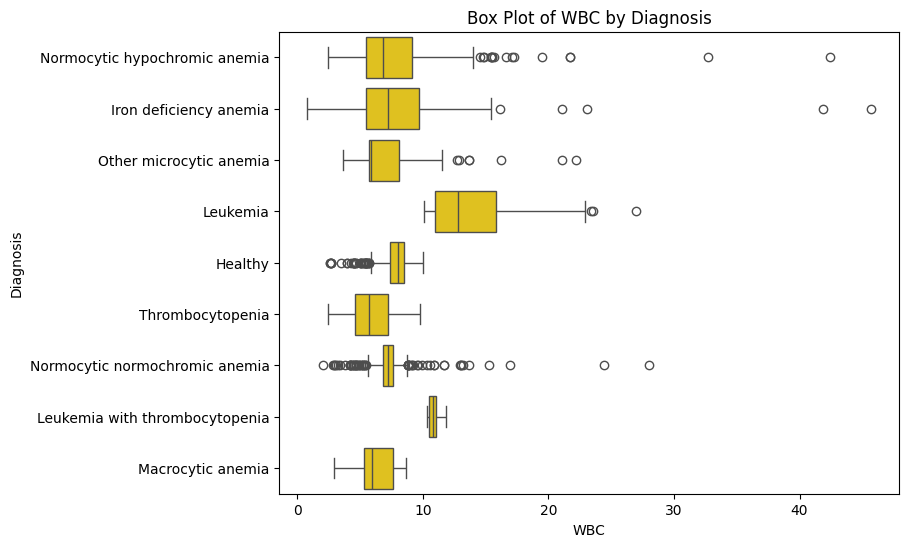

In [320]:
draw_box_plot(df, 'Diagnosis', 'WBC')

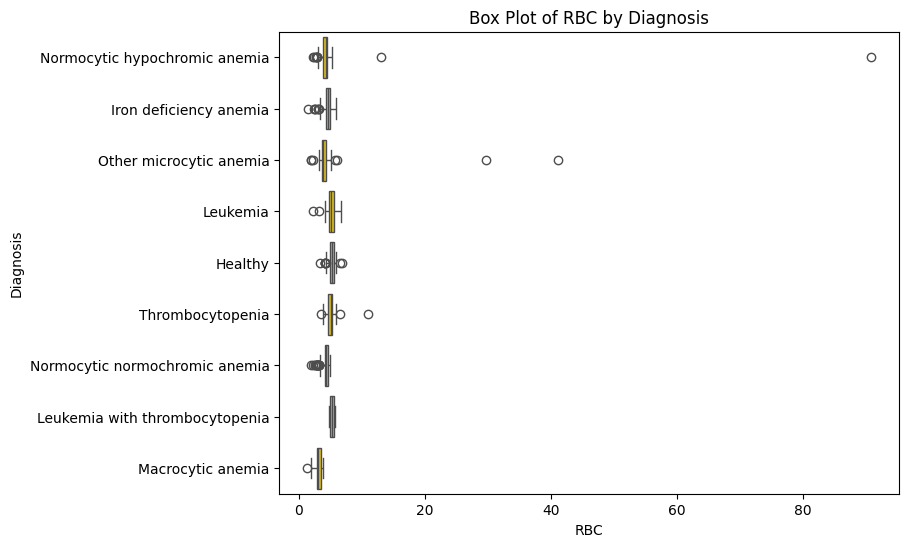

In [321]:
draw_box_plot(df, 'Diagnosis', 'RBC')

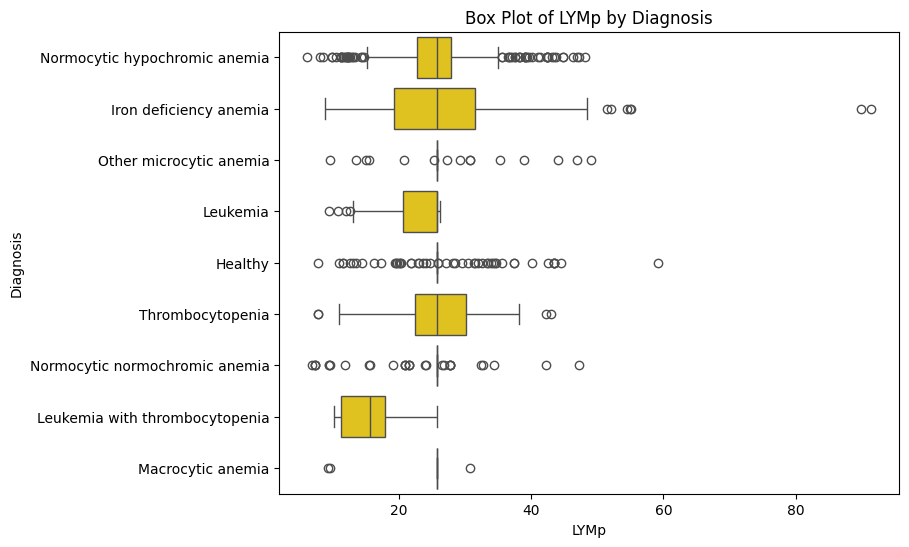

In [322]:
draw_box_plot(df, 'Diagnosis', 'LYMp')

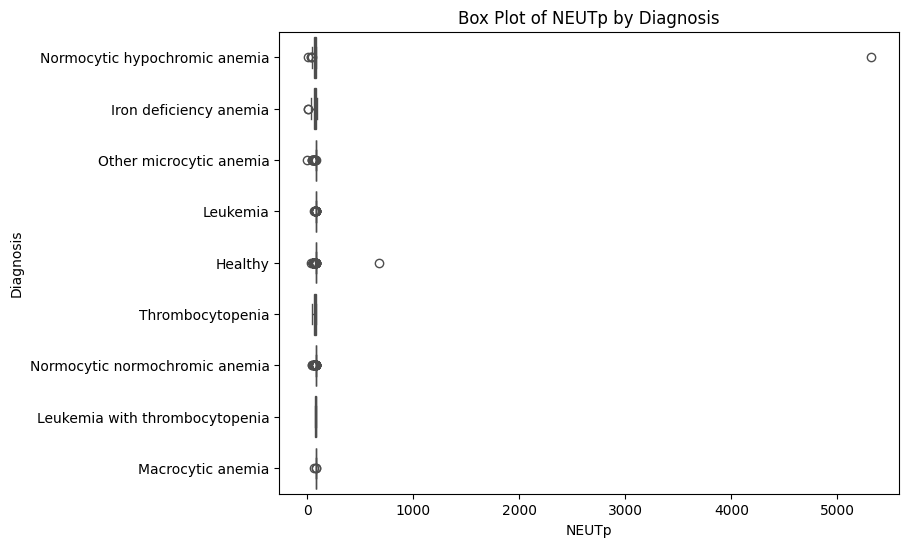

In [323]:
draw_box_plot(df, 'Diagnosis', 'NEUTp')

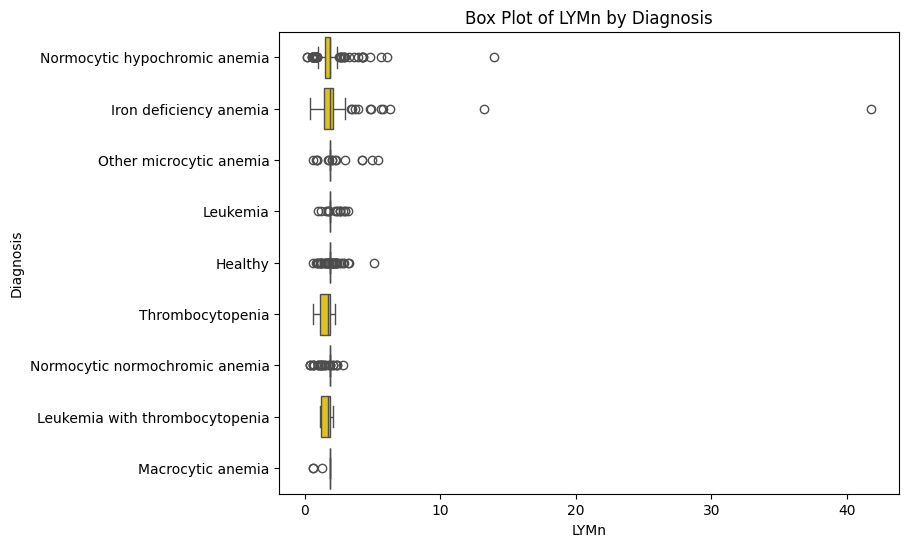

In [324]:
draw_box_plot(df, 'Diagnosis', 'LYMn')

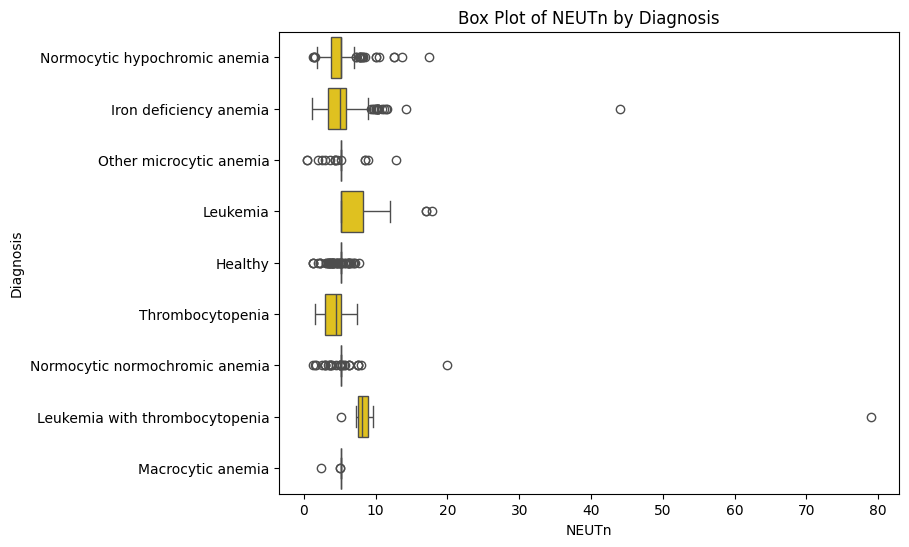

In [325]:
draw_box_plot(df, 'Diagnosis', 'NEUTn')

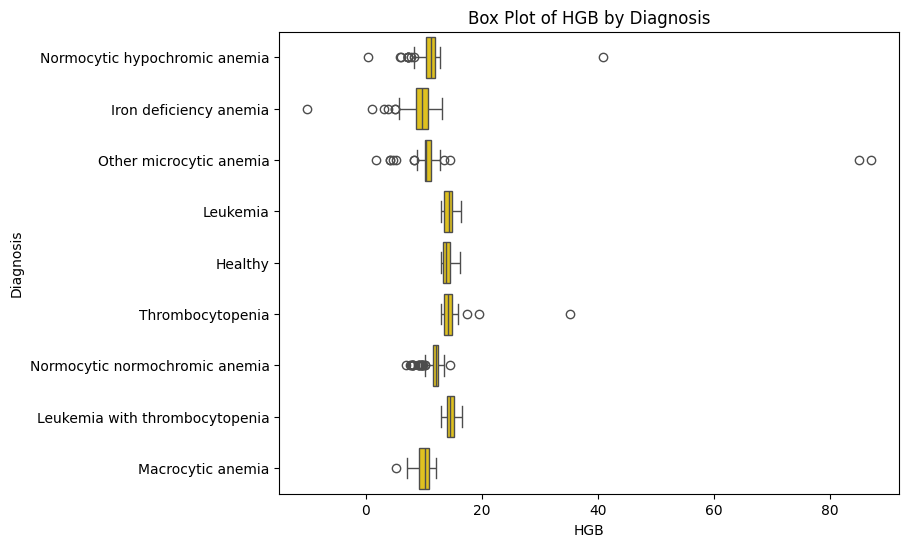

In [326]:
draw_box_plot(df, 'Diagnosis', 'HGB')

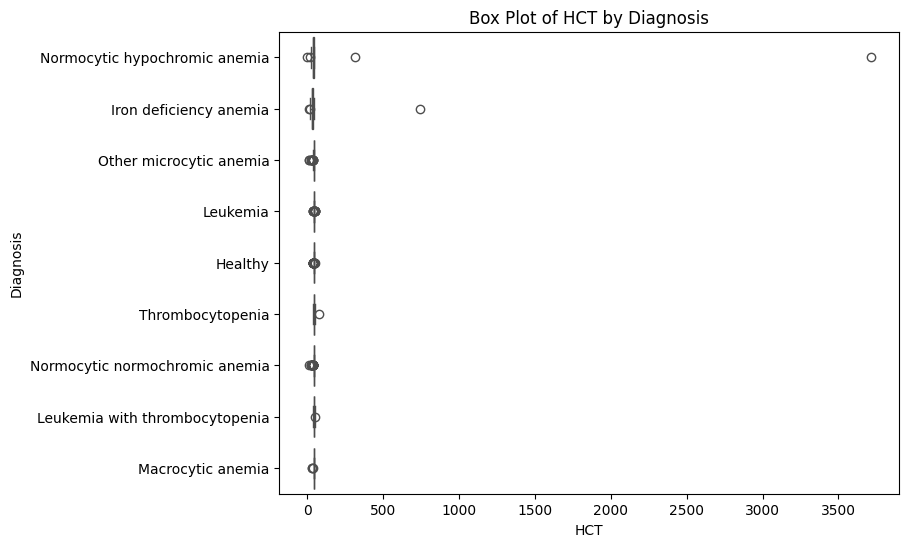

In [327]:
draw_box_plot(df, 'Diagnosis', 'HCT')

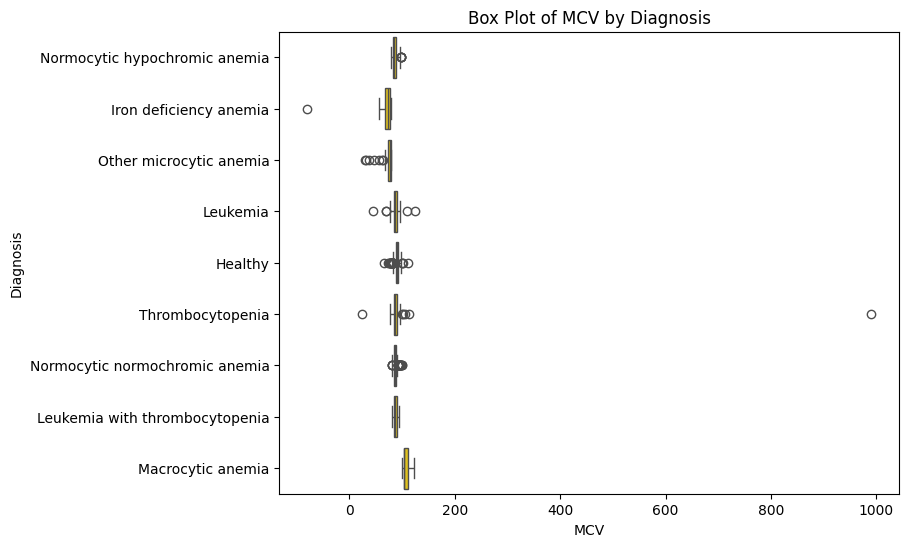

In [328]:
draw_box_plot(df, 'Diagnosis', 'MCV')

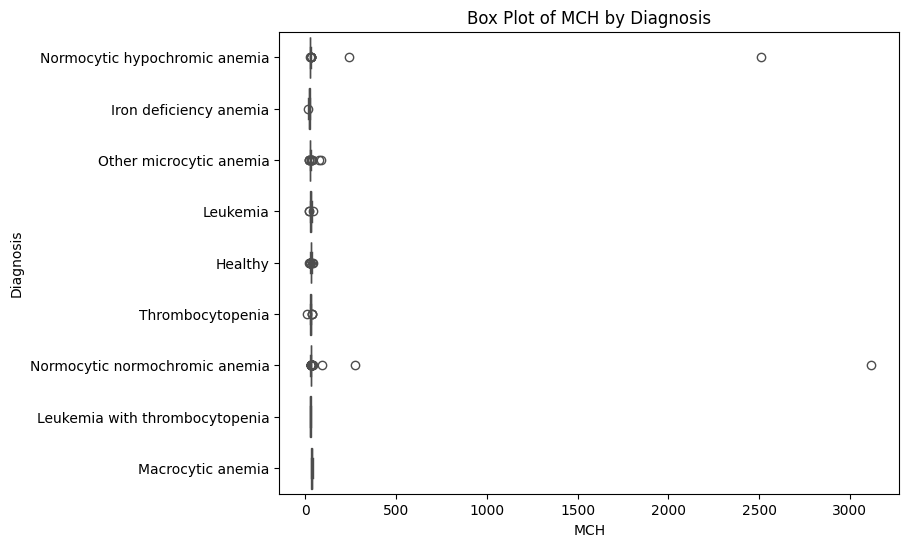

In [329]:
draw_box_plot(df, 'Diagnosis', 'MCH')

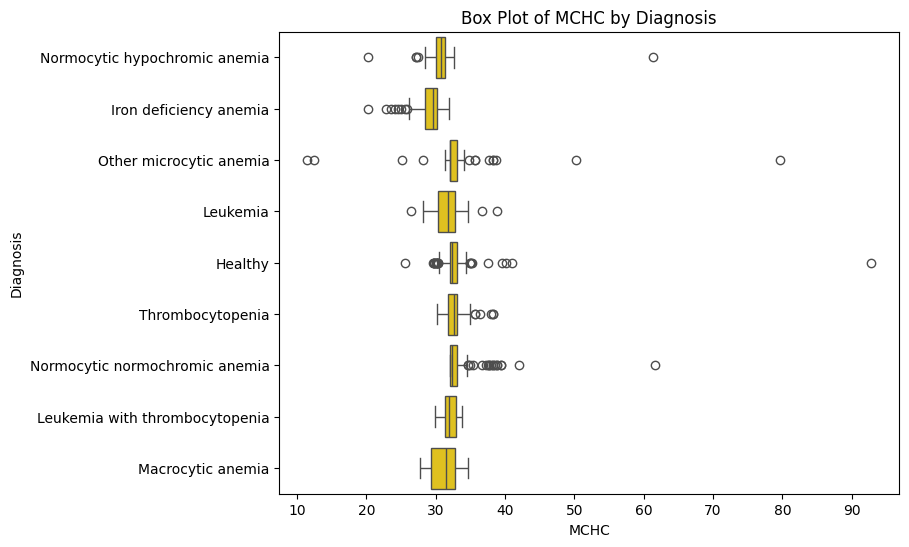

In [330]:
draw_box_plot(df, 'Diagnosis', 'MCHC')

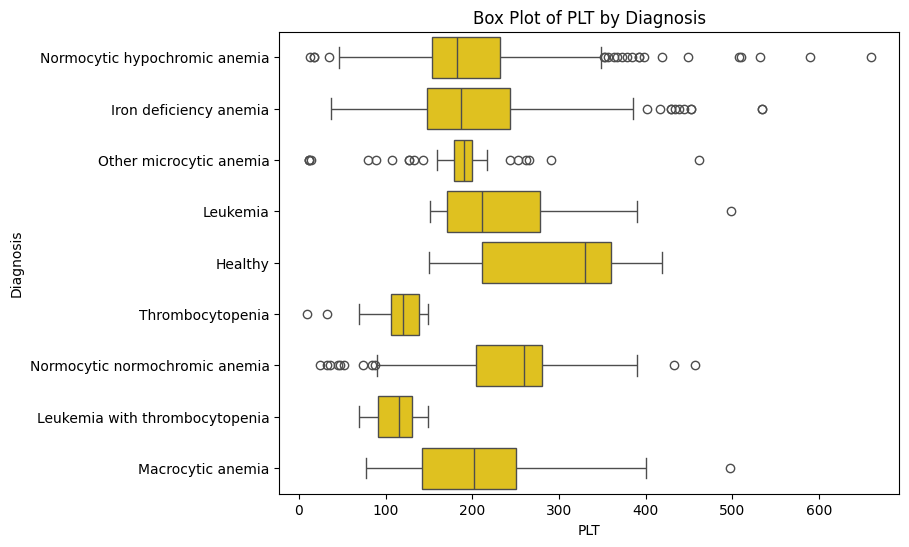

In [331]:
draw_box_plot(df, 'Diagnosis', 'PLT')

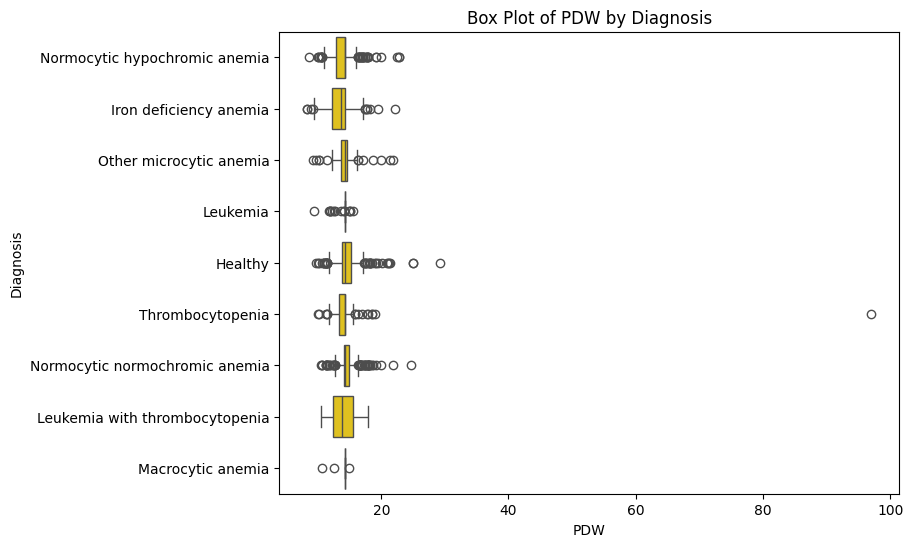

In [332]:
draw_box_plot(df, 'Diagnosis', 'PDW')

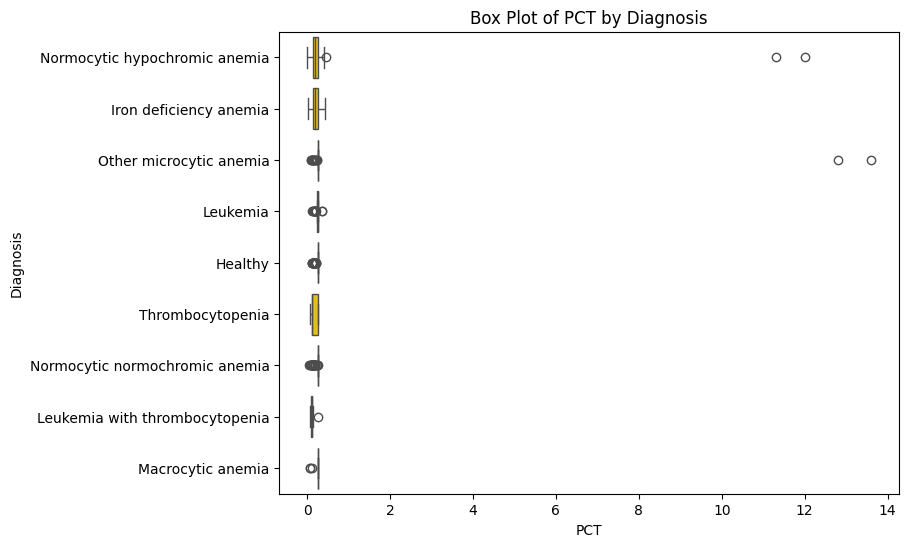

In [333]:
draw_box_plot(df, 'Diagnosis', 'PCT')

### Violin Plot

In [334]:
def draw_violin_plot(data, categorical_column, numerical_column):
    # Violin plot
    plt.figure(figsize=(8, 6))
    sns.violinplot(y=categorical_column, x=numerical_column, data=data, color='aqua')
    plt.title('Violin Plot of {} by {}'.format(numerical_column, categorical_column))
    plt.xlabel(numerical_column)
    plt.ylabel(categorical_column)
    plt.show()

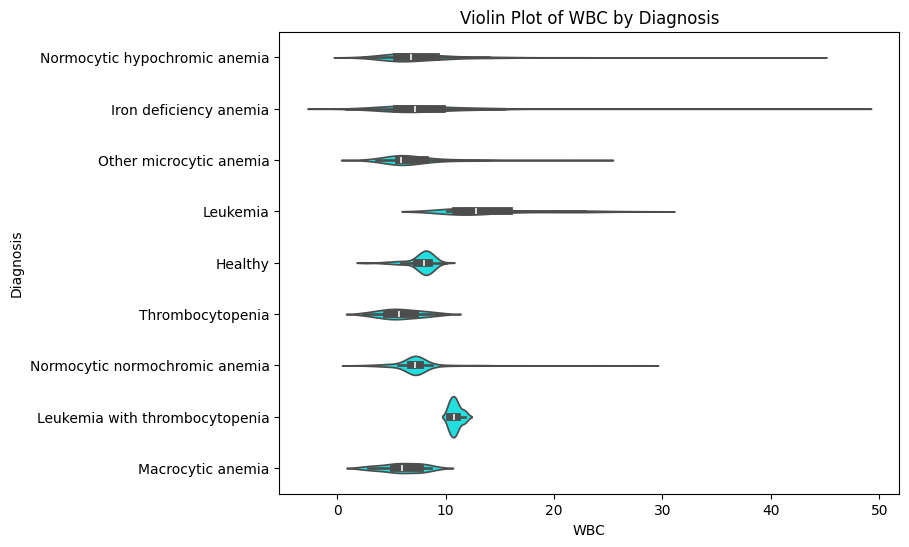

In [335]:
draw_violin_plot(df, 'Diagnosis', 'WBC')

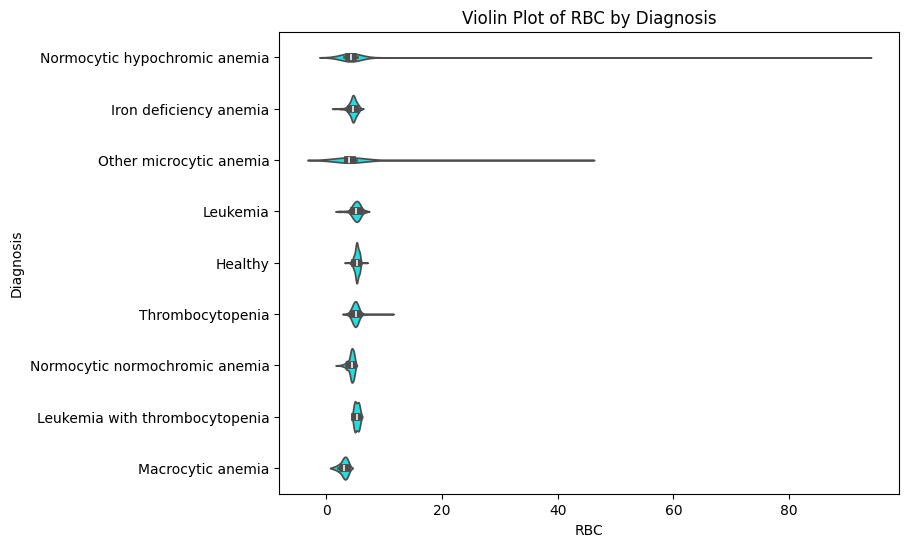

In [336]:
draw_violin_plot(df, 'Diagnosis', 'RBC')

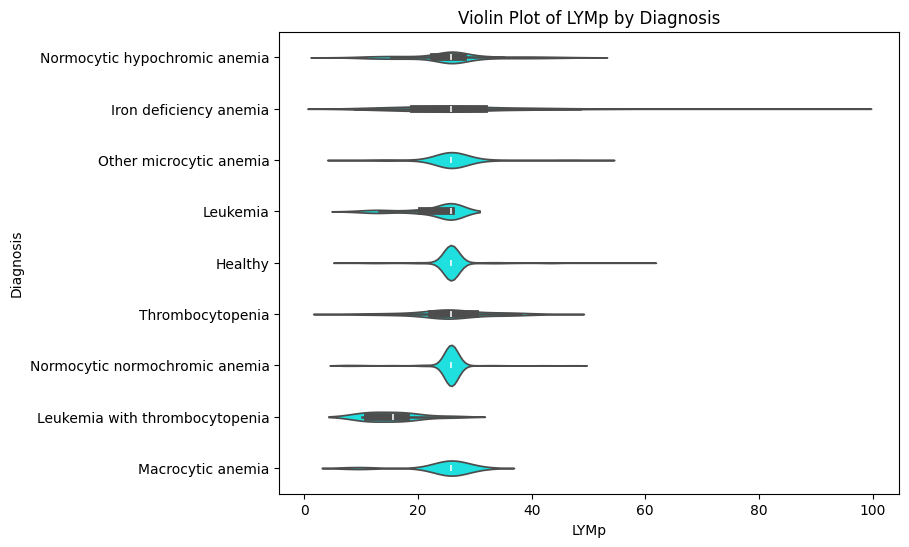

In [337]:
draw_violin_plot(df, 'Diagnosis', 'LYMp')

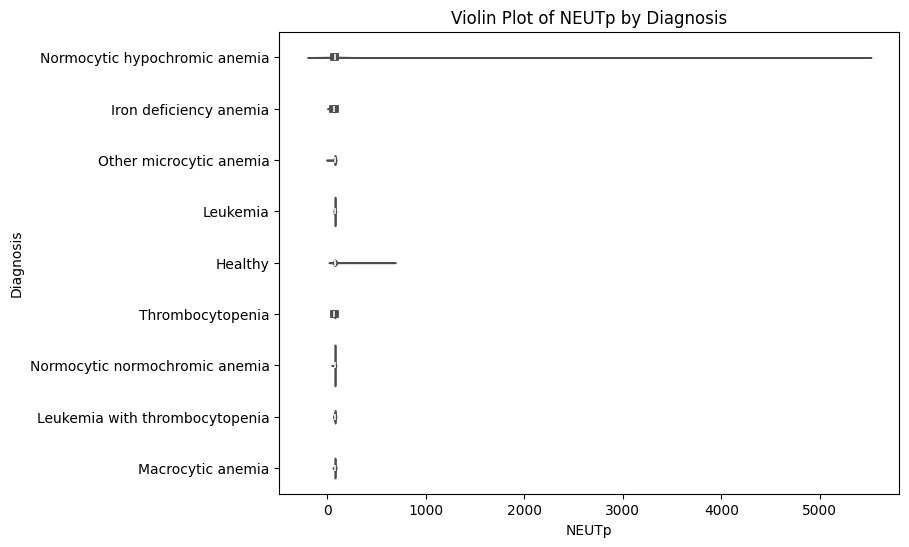

In [338]:
draw_violin_plot(df, 'Diagnosis', 'NEUTp')

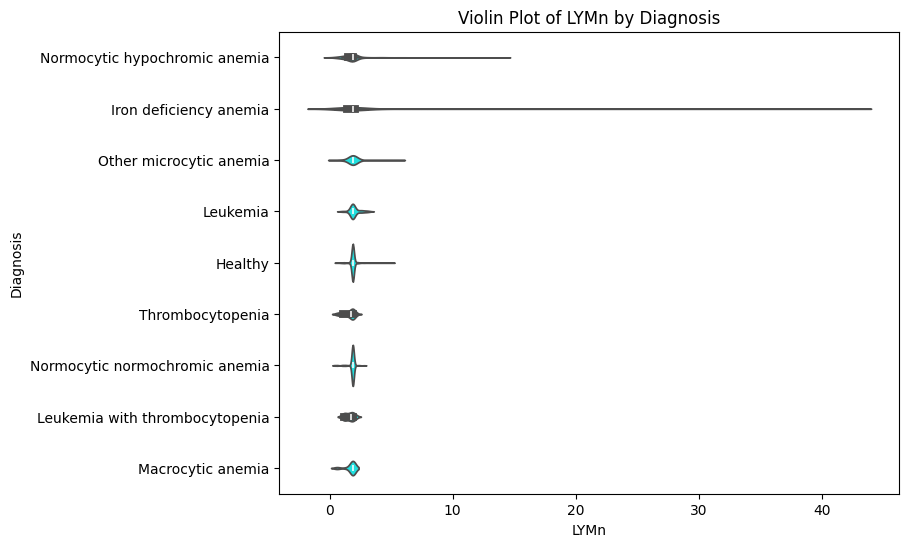

In [339]:
draw_violin_plot(df, 'Diagnosis', 'LYMn')

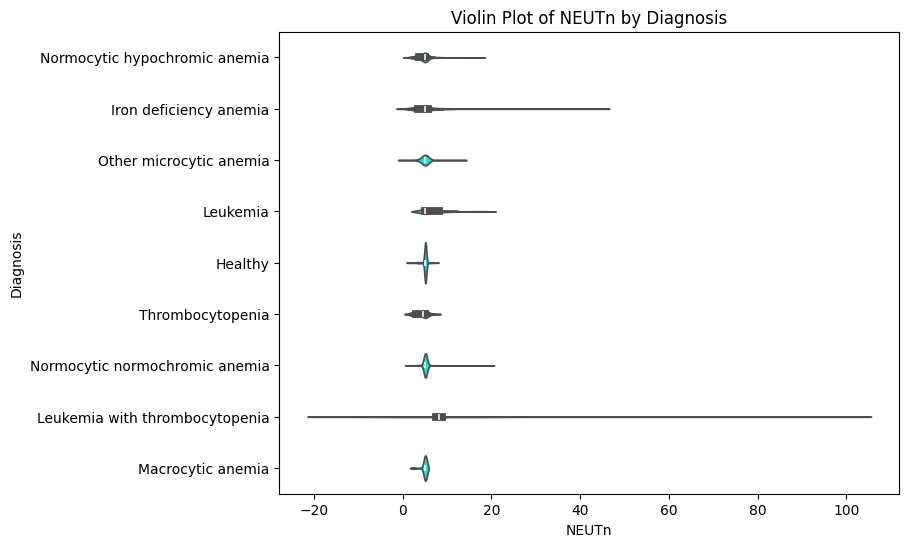

In [340]:
draw_violin_plot(df, 'Diagnosis', 'NEUTn')

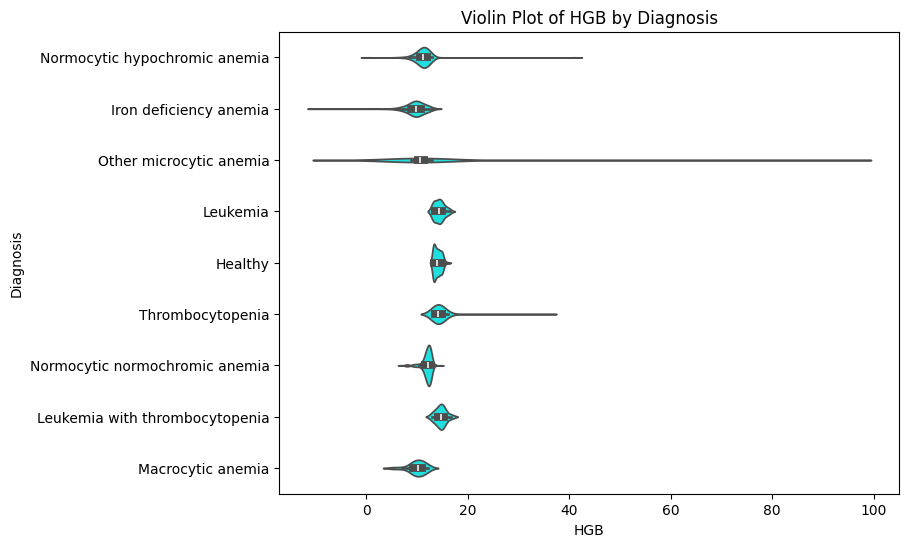

In [341]:
draw_violin_plot(df, 'Diagnosis', 'HGB')

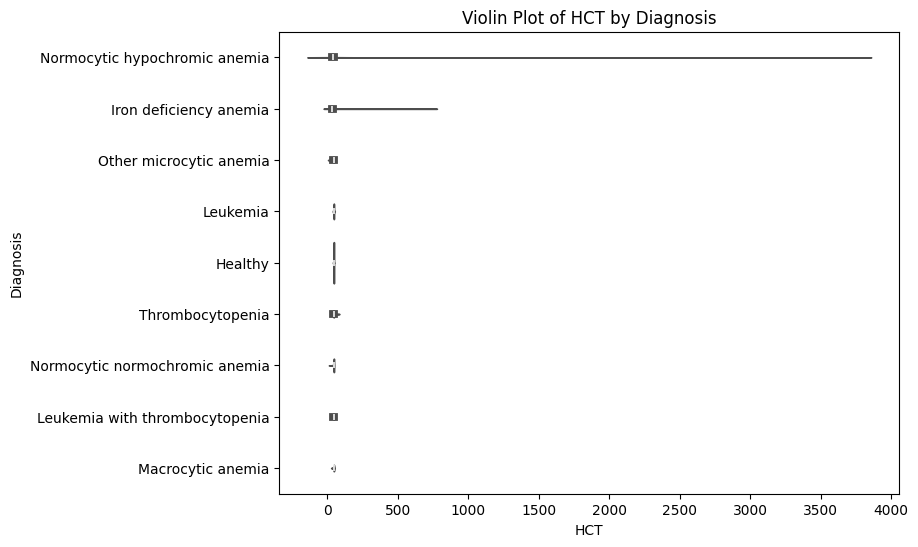

In [342]:
draw_violin_plot(df, 'Diagnosis', 'HCT')

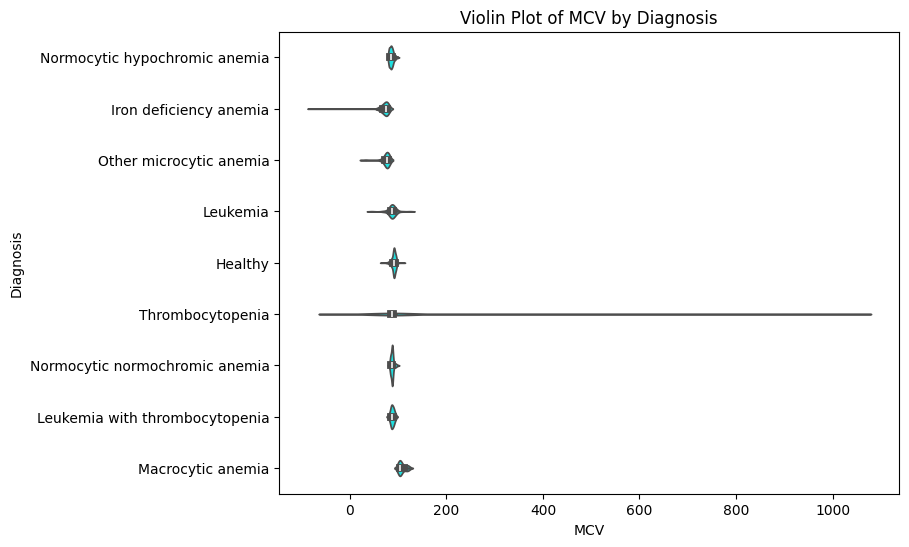

In [343]:
draw_violin_plot(df, 'Diagnosis', 'MCV')

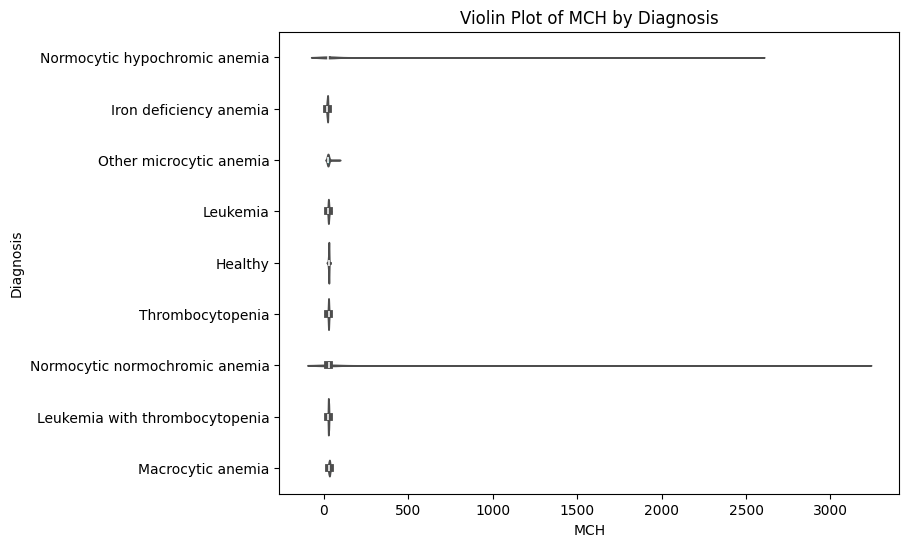

In [344]:
draw_violin_plot(df, 'Diagnosis', 'MCH')

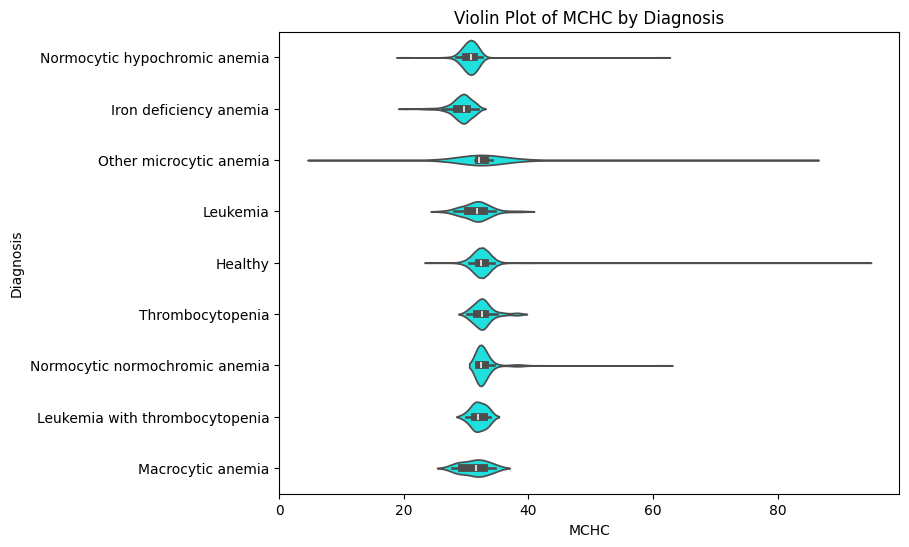

In [345]:
draw_violin_plot(df, 'Diagnosis', 'MCHC')

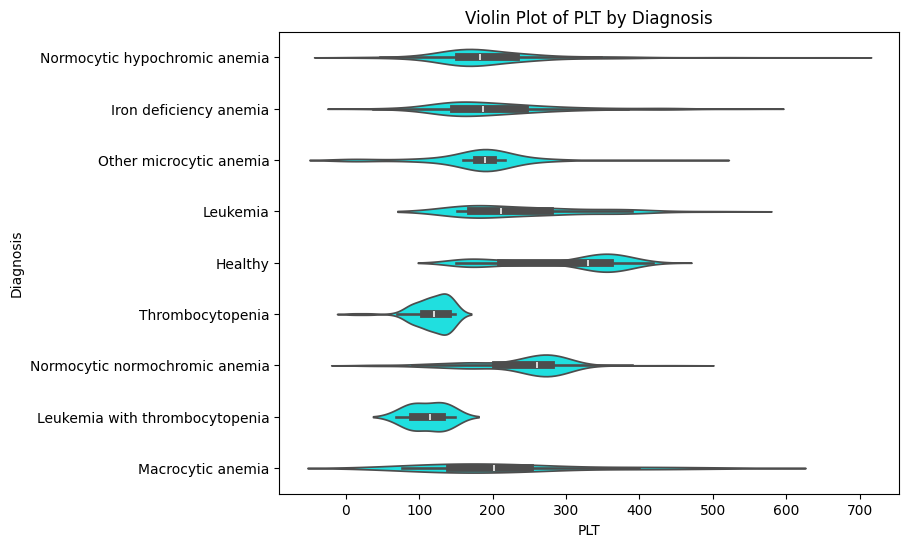

In [346]:
draw_violin_plot(df, 'Diagnosis', 'PLT')

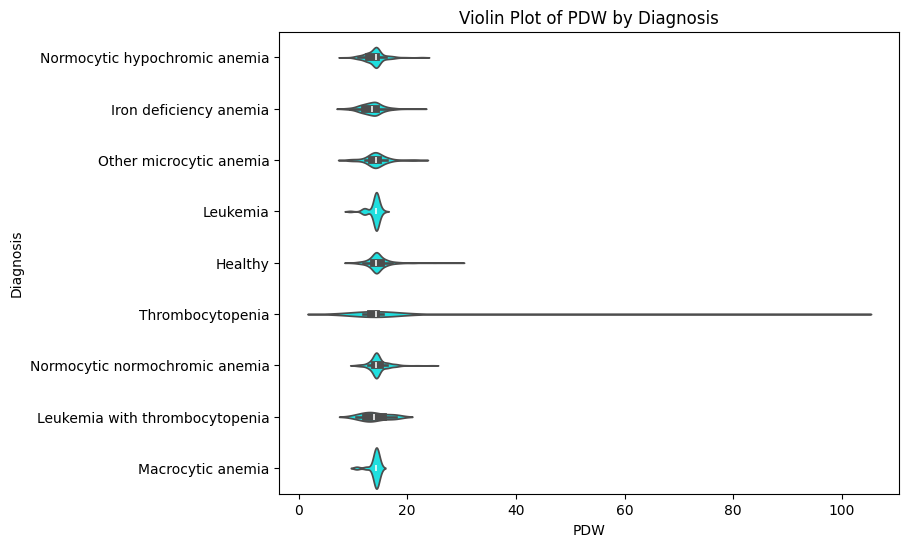

In [347]:
draw_violin_plot(df, 'Diagnosis', 'PDW')

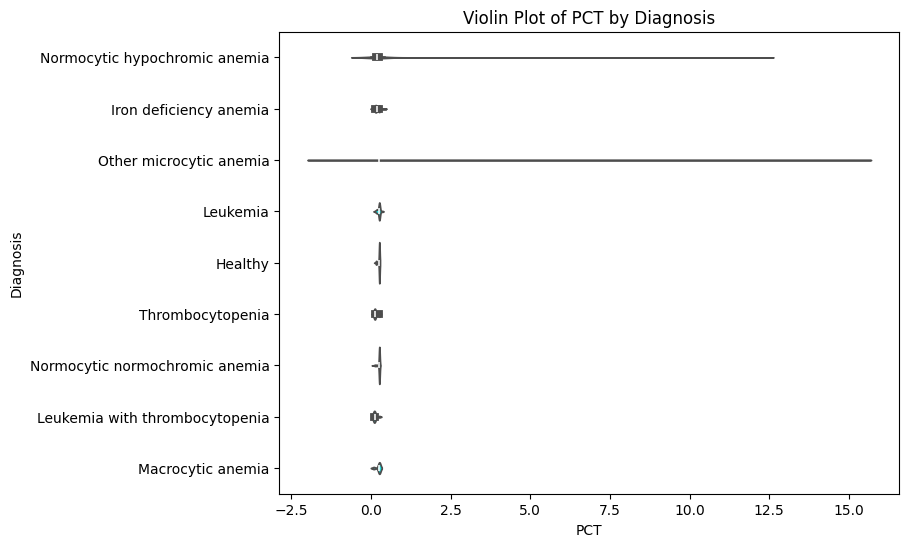

In [348]:
draw_violin_plot(df, 'Diagnosis', 'PCT')

# Feature Engineering

### Correlation Matrix

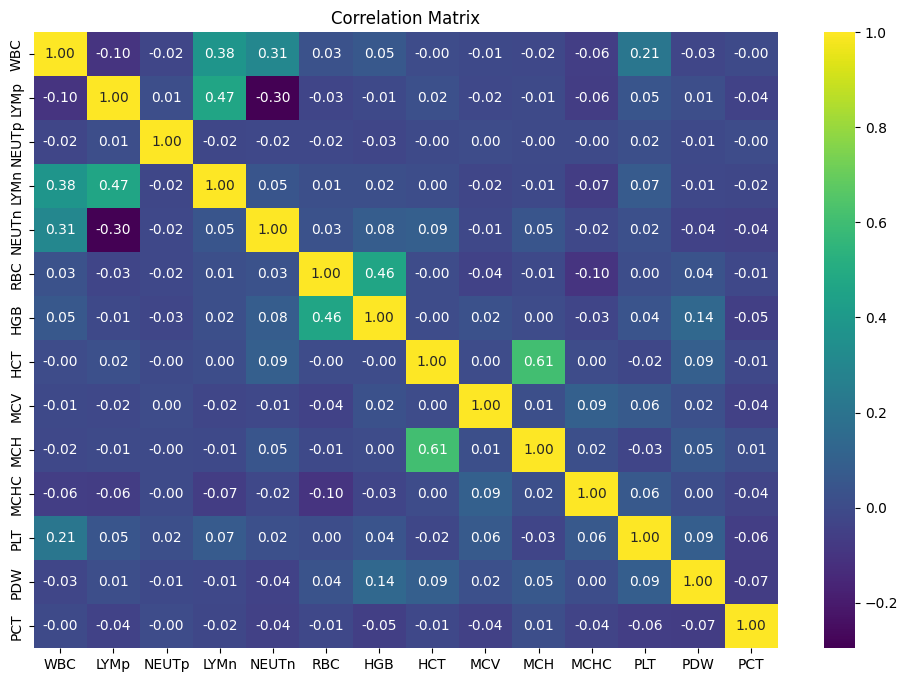

In [350]:
correlation_matrix = df.drop(columns=['Diagnosis']).corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

# Model Synthesis

In [423]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [424]:
df = pd.read_csv("anaemic_data.csv")
df

,WBC,LYMp,NEUTp,LYMn,NEUTn,RBC,HGB,HCT,MCV,MCH,MCHC,PLT,PDW,PCT,Diagnosis
0,10.00,43.200,50.100,4.30000,5.00000,2.77,7.3,24.2000,87.7,26.3,30.1,189.0,12.500000,0.17000,Normocytic hypochromic anemia
1,10.00,42.400,52.300,4.20000,5.30000,2.84,7.3,25.0000,88.2,25.7,20.2,180.0,12.500000,0.16000,Normocytic hypochromic anemia
2,7.20,30.700,60.700,2.20000,4.40000,3.97,9.0,30.5000,77.0,22.6,29.5,148.0,14.300000,0.14000,Iron deficiency anemia
3,6.00,30.200,63.500,1.80000,3.80000,4.22,3.8,32.8000,77.9,23.2,29.8,143.0,11.300000,0.12000,Iron deficiency anemia
4,4.20,39.100,53.700,1.60000,2.30000,3.93,0.4,316.0000,80.6,23.9,29.7,236.0,12.800000,0.22000,Normocytic hypochromic anemia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1276,4.40,25.845,77.511,1.88076,5.14094,4.86,13.5,46.1526,80.7,27.7,34.4,180.0,14.312512,0.26028,Healthy
1277,5.60,25.845,77.511,1.88076,5.14094,4.85,15.0,46.1526,91.7,31.0,33.8,215.0,14.312512,0.26028,Healthy
1278,9.20,25.845,77.511,1.88076,5.14094,4.47,13.1,46.1526,88.7,29.3,33.0,329.0,14.312512,0.26028,Healthy
1279,6.48,25.845,77.511,1.88076,5.14094,4.75,13.2,46.1526,86.7,27.9,32.1,174.0,14.312512,0.26028,Healthy


In [425]:
x = df.drop(columns=['Diagnosis'], axis=1)
y = df['Diagnosis']

In [426]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [427]:
x_train.shape, x_test.shape

((1024, 14), (257, 14))

In [428]:
y_train.shape, y_test.shape

((1024,), (257,))

## Machine Learning

In [429]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier, XGBRFClassifier

### Logistic Regression

In [430]:
lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression()

In [431]:
train_accuracy = lr.score(x_train, y_train)
test_accuracy = lr.score(x_test, y_test)

print(f"Training Accuracy: {train_accuracy}")
print(f"Testing Accuracy: {test_accuracy}")

Training Accuracy: 0.5791015625
Testing Accuracy: 0.5875486381322957


In [432]:
y_pred = lr.predict(x_test)

In [433]:
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy Score: {accuracy}")

Accuracy Score: 0.5875486381322957


In [434]:
classif_report = classification_report(y_test, y_pred)
print(classif_report)

                                precision    recall  f1-score   support

                       Healthy       0.73      0.75      0.74        81
        Iron deficiency anemia       0.71      0.71      0.71        34
                      Leukemia       0.00      0.00      0.00         5
Leukemia with thrombocytopenia       0.00      0.00      0.00         3
             Macrocytic anemia       0.00      0.00      0.00         1
 Normocytic hypochromic anemia       0.46      0.48      0.47        56
Normocytic normochromic anemia       0.46      0.57      0.51        46
       Other microcytic anemia       0.00      0.00      0.00        14
              Thrombocytopenia       0.62      0.76      0.68        17

                      accuracy                           0.59       257
                     macro avg       0.33      0.36      0.35       257
                  weighted avg       0.55      0.59      0.57       257



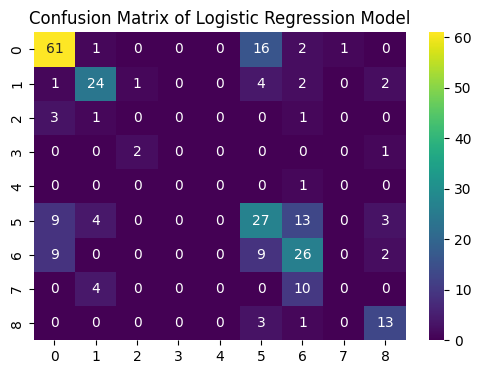

In [435]:
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, cmap='viridis', fmt=".0f")
plt.title("Confusion Matrix of Logistic Regression Model")
plt.show()

### Support Vector Classifier

In [436]:
svc = SVC()
svc.fit(x_train, y_train)

SVC()

In [437]:
train_accuracy = svc.score(x_train, y_train)
test_accuracy = svc.score(x_test, y_test)

print(f"Training Accuracy: {train_accuracy}")
print(f"Testing Accuracy: {test_accuracy}")

Training Accuracy: 0.4921875
Testing Accuracy: 0.48638132295719844


In [438]:
y_pred = svc.predict(x_test)

In [439]:
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy Score: {accuracy}")

Accuracy Score: 0.48638132295719844


In [440]:
classif_report = classification_report(y_test, y_pred)
print(classif_report)

                                precision    recall  f1-score   support

                       Healthy       0.86      0.62      0.72        81
        Iron deficiency anemia       1.00      0.12      0.21        34
                      Leukemia       0.00      0.00      0.00         5
Leukemia with thrombocytopenia       0.00      0.00      0.00         3
             Macrocytic anemia       0.00      0.00      0.00         1
 Normocytic hypochromic anemia       0.33      0.82      0.47        56
Normocytic normochromic anemia       0.45      0.54      0.50        46
       Other microcytic anemia       0.00      0.00      0.00        14
              Thrombocytopenia       0.00      0.00      0.00        17

                      accuracy                           0.49       257
                     macro avg       0.29      0.23      0.21       257
                  weighted avg       0.56      0.49      0.45       257



Text(0.5, 1.0, 'Confusion Matrix of SVC Model')

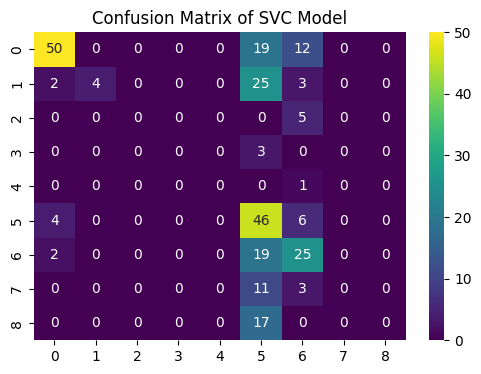

In [441]:
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, cmap='viridis', fmt=".0f")
plt.title("Confusion Matrix of SVC Model")

### K- Neighbours Classifier

In [442]:
k_neighbours = KNeighborsClassifier()
k_neighbours.fit(x_train, y_train)

KNeighborsClassifier()

In [443]:
train_accuracy = k_neighbours.score(x_train, y_train)
test_accuracy = k_neighbours.score(x_test, y_test)

print(f"Training Accuracy: {train_accuracy}")
print(f"Testing Accuracy: {test_accuracy}")

Training Accuracy: 0.779296875
Testing Accuracy: 0.669260700389105


In [444]:
y_pred = k_neighbours.predict(x_test)

In [445]:
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy Score: {accuracy}")

Accuracy Score: 0.669260700389105


In [446]:
classif_report = classification_report(y_test, y_pred)
print(classif_report)

                                precision    recall  f1-score   support

                       Healthy       0.82      0.84      0.83        81
        Iron deficiency anemia       0.73      0.65      0.69        34
                      Leukemia       0.00      0.00      0.00         5
Leukemia with thrombocytopenia       0.00      0.00      0.00         3
             Macrocytic anemia       0.00      0.00      0.00         1
 Normocytic hypochromic anemia       0.56      0.62      0.59        56
Normocytic normochromic anemia       0.66      0.59      0.62        46
       Other microcytic anemia       0.71      0.71      0.71        14
              Thrombocytopenia       0.50      0.59      0.54        17

                      accuracy                           0.67       257
                     macro avg       0.44      0.44      0.44       257
                  weighted avg       0.67      0.67      0.67       257



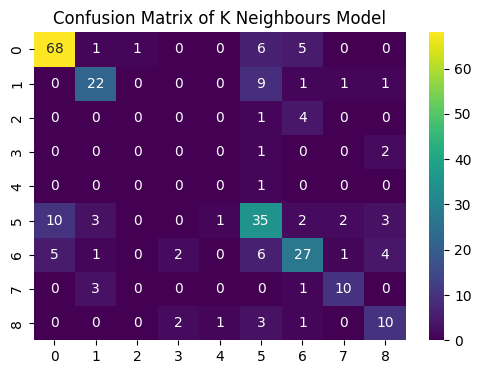

In [447]:
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, cmap='viridis', fmt=".0f")
plt.title("Confusion Matrix of K Neighbours Model")
plt.show()

### Decision Tree Classifier

In [448]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)

DecisionTreeClassifier()

In [449]:
train_accuracy = dtc.score(x_train, y_train)
test_accuracy = dtc.score(x_test, y_test)

print(f"Training Accuracy: {train_accuracy}")
print(f"Testing Accuracy: {test_accuracy}")

Training Accuracy: 1.0
Testing Accuracy: 0.9922178988326849


In [450]:
y_pred = dtc.predict(x_test)

In [451]:
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy Score: {accuracy}")

Accuracy Score: 0.9922178988326849


In [452]:
classif_report = classification_report(y_test, y_pred)
print(classif_report)

                                precision    recall  f1-score   support

                       Healthy       1.00      1.00      1.00        81
        Iron deficiency anemia       1.00      1.00      1.00        34
                      Leukemia       1.00      1.00      1.00         5
Leukemia with thrombocytopenia       0.60      1.00      0.75         3
             Macrocytic anemia       1.00      1.00      1.00         1
 Normocytic hypochromic anemia       1.00      1.00      1.00        56
Normocytic normochromic anemia       1.00      0.98      0.99        46
       Other microcytic anemia       1.00      0.93      0.96        14
              Thrombocytopenia       1.00      1.00      1.00        17

                      accuracy                           0.99       257
                     macro avg       0.96      0.99      0.97       257
                  weighted avg       1.00      0.99      0.99       257



Text(0.5, 1.0, 'Confusion Matrix of Decision Tree Model')

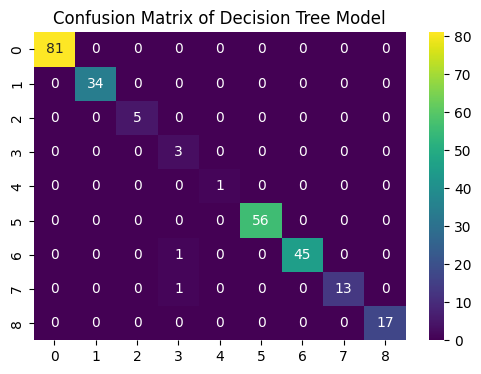

In [453]:
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, cmap='viridis', fmt=".0f")
plt.title("Confusion Matrix of Decision Tree Model")

### Random Forest Classifier

In [454]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier()

In [455]:
train_accuracy = rf.score(x_train, y_train)
test_accuracy = rf.score(x_test, y_test)

print(f"Training Accuracy: {train_accuracy}")
print(f"Testing Accuracy: {test_accuracy}")

Training Accuracy: 1.0
Testing Accuracy: 0.9883268482490273


In [456]:
y_pred = rf.predict(x_test)

In [457]:
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy Score: {accuracy}")

Accuracy Score: 0.9883268482490273


In [458]:
classif_report = classification_report(y_test, y_pred)
print(classif_report)

                                precision    recall  f1-score   support

                       Healthy       0.99      1.00      0.99        81
        Iron deficiency anemia       1.00      1.00      1.00        34
                      Leukemia       1.00      0.80      0.89         5
Leukemia with thrombocytopenia       0.75      1.00      0.86         3
             Macrocytic anemia       0.00      0.00      0.00         1
 Normocytic hypochromic anemia       1.00      1.00      1.00        56
Normocytic normochromic anemia       0.98      0.98      0.98        46
       Other microcytic anemia       1.00      1.00      1.00        14
              Thrombocytopenia       1.00      1.00      1.00        17

                      accuracy                           0.99       257
                     macro avg       0.86      0.86      0.86       257
                  weighted avg       0.99      0.99      0.99       257



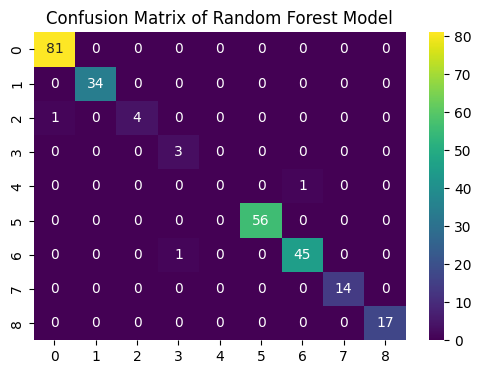

In [459]:
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, cmap='viridis', fmt=".0f")
plt.title("Confusion Matrix of Random Forest Model")
plt.show()

### XGBoost Classifier

In [460]:
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

In [461]:
xgb = XGBClassifier()
xgb.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [462]:
train_accuracy = xgb.score(x_train, y_train)
test_accuracy = xgb.score(x_test, y_test)

print(f"Training Accuracy: {train_accuracy}")
print(f"Testing Accuracy: {test_accuracy}")

Training Accuracy: 1.0
Testing Accuracy: 0.9883268482490273


In [463]:
y_pred = xgb.predict(x_test)

In [464]:
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy Score: {accuracy}")

Accuracy Score: 0.9883268482490273


In [465]:
classif_report = classification_report(y_test, y_pred)
print(classif_report)

              precision    recall  f1-score   support

           0       1.00      0.99      0.99        81
           1       1.00      0.97      0.99        34
           2       0.83      1.00      0.91         5
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00        56
           6       1.00      0.98      0.99        46
           7       0.88      1.00      0.93        14
           8       1.00      1.00      1.00        17

    accuracy                           0.99       257
   macro avg       0.97      0.99      0.98       257
weighted avg       0.99      0.99      0.99       257



Text(0.5, 1.0, 'Confusion Matrix of XGBoost Model')

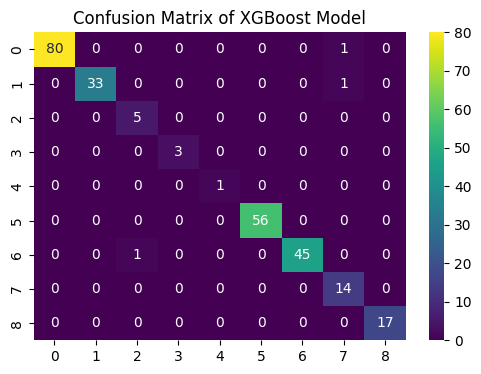

In [466]:
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, cmap='viridis', fmt=".0f")
plt.title("Confusion Matrix of XGBoost Model")

### XGBoost Random Forest Classifier

In [467]:
xgbrf = XGBRFClassifier()
xgbrf.fit(x_train, y_train)

XGBRFClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bytree=None, device=None,
                early_stopping_rounds=None, enable_categorical=False,
                eval_metric=None, feature_types=None, gamma=None,
                grow_policy=None, importance_type=None,
                interaction_constraints=None, max_bin=None,
                max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=None, max_leaves=None,
                min_child_weight=None, missing=nan, monotone_constraints=None,
                multi_strategy=None, n_estimators=None, n_jobs=None,
                num_parallel_tree=None, objective='multi:softprob',
                random_state=None, reg_alpha=None, ...)

In [468]:
train_accuracy = xgbrf.score(x_train, y_train)
test_accuracy = xgbrf.score(x_test, y_test)

print(f"Training Accuracy: {train_accuracy}")
print(f"Testing Accuracy: {test_accuracy}")

Training Accuracy: 0.99609375
Testing Accuracy: 0.9844357976653697


In [469]:
y_pred = xgbrf.predict(x_test)

In [470]:
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy Score: {accuracy}")

Accuracy Score: 0.9844357976653697


In [471]:
classif_report = classification_report(y_test, y_pred)
print(classif_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        81
           1       1.00      0.97      0.99        34
           2       0.71      1.00      0.83         5
           3       1.00      0.33      0.50         3
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00        56
           6       1.00      0.98      0.99        46
           7       0.93      1.00      0.97        14
           8       0.94      1.00      0.97        17

    accuracy                           0.98       257
   macro avg       0.95      0.92      0.92       257
weighted avg       0.99      0.98      0.98       257



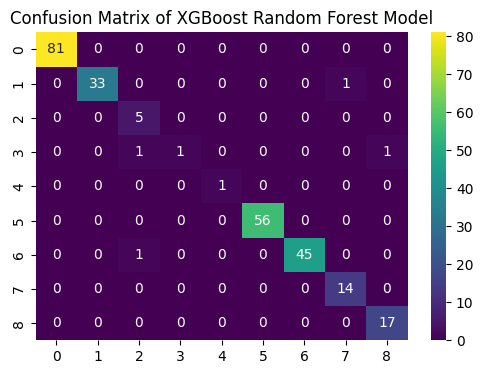

In [472]:
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, cmap='viridis', fmt=".0f")
plt.title("Confusion Matrix of XGBoost Random Forest Model")
plt.show()

### Saving the models

In [473]:
import os
import joblib

directory = "Models"

if not os.path.exists(directory):
    os.makedirs(directory)

joblib.dump(lr, f"{directory}/logistic_regression_model.pkl")
joblib.dump(svc, f"{directory}/svc_model.pkl")
joblib.dump(k_neighbours, f"{directory}/k_neighbours_model.pkl")
joblib.dump(dtc, f"{directory}/decision_tree_model.pkl")
joblib.dump(rf, f"{directory}/random_forest_model.pkl")
joblib.dump(xgb, f"{directory}/xgboost_model.pkl")
joblib.dump(xgbrf, f"{directory}/xgboost_random_forest_model.pkl")
print("Models saved successfully!")

Models saved successfully!


# Model Evaluation

NaN values found in predicted probabilities for model: Decision Tree Classifier


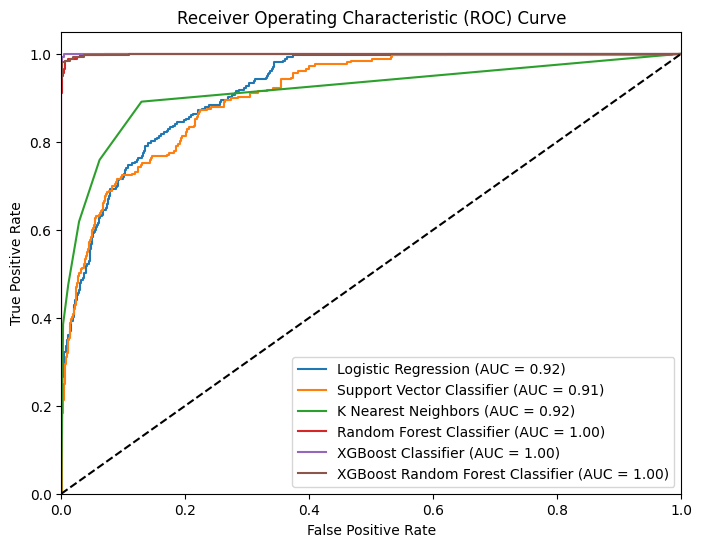

In [474]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier  

x = df.drop(columns=['Diagnosis'], axis=1)
y = df['Diagnosis']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# One-vs-Rest (OvR) strategy
ovr_lr = OneVsRestClassifier(LogisticRegression())
ovr_svc = OneVsRestClassifier(SVC(probability=True))
ovr_k_neighbours = OneVsRestClassifier(KNeighborsClassifier())
ovr_dtc = OneVsRestClassifier(DecisionTreeClassifier())
ovr_rf = OneVsRestClassifier(RandomForestClassifier())
ovr_xgb = OneVsRestClassifier(XGBClassifier())
ovr_xgbrf = OneVsRestClassifier(XGBRFClassifier())

# Fit OvR models
ovr_lr.fit(x_train, y_train)
ovr_svc.fit(x_train, y_train)
ovr_k_neighbours.fit(x_train, y_train)
ovr_dtc.fit(x_train, y_train)
ovr_rf.fit(x_train, y_train)
ovr_xgb.fit(x_train, y_train)
ovr_xgbrf.fit(x_train, y_train)

# Get predicted probabilities for each OvR model
lr_probs = ovr_lr.predict_proba(x_test)
svc_probs = ovr_svc.predict_proba(x_test)
k_neighbours_probs = ovr_k_neighbours.predict_proba(x_test)
dtc_probs = ovr_dtc.predict_proba(x_test)
rf_probs = ovr_rf.predict_proba(x_test)
xgb_probs = ovr_xgb.predict_proba(x_test)
xgbrf_probs = ovr_xgbrf.predict_proba(x_test)

models_probs = {
    'Logistic Regression': lr_probs,
    'Support Vector Classifier': svc_probs,
    'K Nearest Neighbors': k_neighbours_probs,
    'Decision Tree Classifier': dtc_probs,
    'Random Forest Classifier': rf_probs,
    'XGBoost Classifier': xgb_probs,
    'XGBoost Random Forest Classifier': xgbrf_probs
}

# Computing ROC curve and ROC area for each model
plt.figure(figsize=(8, 6))
for model, probs in models_probs.items():
    # Binarize the labels for multiclass classification
    y_test_binarized = label_binarize(y_test, classes=ovr_lr.classes_)
    if np.isnan(probs).any():
        print(f"NaN values found in predicted probabilities for model: {model}")
    else:
        fpr, tpr, _ = roc_curve(y_test_binarized.ravel(), probs.ravel())
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label='%s (AUC = %0.2f)' % (model, roc_auc))


# Plotting ROC curve for random guessing
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
